##  Rozwiązywanie układu równań liniowych metodami rozkładu LU 

Podaj zasadę działania metod opartych o dekompozycję LU. 

#### Zadanie 1
Zaimplementuj metody rozkładu LU:
- Rozkład Crouta 
- Rozkład Doolitla
- Rozkład Choleskyego 

Dla każdej z metod podaj warunki niezbędne aby można ją było zastosować. Sprawdź poprawność działania tych metod. 

Przetestuj wydajność algorytmów dla kilku rozmiarów macierzy (podobnie jak w ćwiczeniu 9). 

### Podstawowy warunek obowiązujący dla każdej z poniższych metod:
Dana macierz A ma rozkład LU, jeżli wszytskie minory główne tej macierzy są nieosobliwe

### 1) Rozkład Crouta

Rozkład Crouta jest mozliwy, jeżeli macierz A jest rzeczywista, kwadratowa oraz nieosobliwa.

In [25]:
import numpy as np

def Crout_decomposition(A):
    n = len(A)
    L = [[0 for x in range(n)]  
            for y in range(n)]; 
    U = [[0 for x in range(n)]  
            for y in range(n)]; 
    for i in range(n):
        U[i][i]=1
    sum = 0
    for j in range(n):
        for i in range(j, n, +1):
            sum = 0
            for k in range(j):
                sum = sum + L[i][k]*U[k][j]
            L[i][j] = A[i][j] - sum
        for i in range(j, n, +1):
            sum = 0
            for k in range(j):
                sum = sum + L[j][k]*U[k][i]
            if L[j][j]==0:
                print("Error! L[i][i]= 0, method doesn't work in this case")
            U[j][i] = (A[j][i] - sum)/ L[j][j]
    return L, U

def linear_equations_Crout_method(A, b):
    L, U = Crout_decomposition(A)
    print("L:\n",np.array(L))
    print("U:\n",np.array(U))
    n = len(A)
    y = np.zeros(n)
    x = np.zeros(n)
    for i in range(n):
        sum = 0
        for j in range(i):
            sum = sum + L[i][j]*y[j]
        y[i]=(b[i]-sum)/L[i][i]

    for i in range(n-1, -1, -1):
        sum = 0
        for j in range(i, n, +1):
            sum = sum + U[i][j]*x[j]
        x[i]=(y[i]-sum)/U[i][i]
    return x

A = [[6,15,55], [15,55,225], [55,225,979]]
b = [76, 295, 1259]
print("\nWynik:",linear_equations_Crout_method(A, b))

L:
 [[ 6.          0.          0.        ]
 [15.         17.5         0.        ]
 [55.         87.5        37.33333333]]
U:
 [[1.         2.5        9.16666667]
 [0.         1.         5.        ]
 [0.         0.         1.        ]]

Wynik: [1. 1. 1.]


### 2) Rozkład Doolittla

Rozkład Doolittla jest mozliwy, jeżeli macierz A jest rzeczywista, kwadratowa oraz nieosobliwa.

In [24]:
import numpy as np
def Doolittle_decomposition(A):
    n = len(A)
    L = [[0 for x in range(n)]  
            for y in range(n)]; 
    U = [[0 for x in range(n)]  
            for y in range(n)]; 
    
    for i in range(n):
        L[i][i]=1
    for i in range(n):
        for j in range(i, n, +1):
            sum = 0
            for k in range(i):
                sum = sum + L[i][k]*U[k][j]
            U[i][j] = A[i][j] - sum
        for j in range(i, n, +1):
            sum = 0
            for k in range(i):
                sum = sum + L[j][k]*U[k][i]
            if U[i][i]==0:
                print("Error! U[i][i]= 0, method doesn't work in this case")
            L[j][i] = (A[j][i] - sum)/ U[i][i]
    return L, U

def linear_equations_Doolittle_method(A, b):
    L, U = Doolittle_decomposition(A)
    print("L:\n",np.array(L))
    print("U:\n",np.array(U))
    n = len(A)
    y = np.zeros(n)
    for i in range(n):
        sum = 0
        for j in range(i):
            sum = sum + L[i][j]*y[j]
        y[i]=b[i]-sum

    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        sum = 0
        for j in range(i, n, +1):
            sum = sum + U[i][j]*x[j]
        x[i]=(y[i] - sum)/U[i][i]
    return x

A = [[6,15,55], [15,55,225], [55,225,979]]
b = [76, 295, 1259]
print("\nWynik:",linear_equations_Doolittle_method(A, b))     

L:
 [[1.         0.         0.        ]
 [2.5        1.         0.        ]
 [9.16666667 5.         1.        ]]
U:
 [[ 6.         15.         55.        ]
 [ 0.         17.5        87.5       ]
 [ 0.          0.         37.33333333]]

wynik: [1. 1. 1.]


### 3) Rozkład Choleskyego

Rozkład Choleskyego jest mozliwy, jeżeli macierz A jest rzeczywista, symetryczna i dodatnio określona, jest macierzą nieosobliwą. 

In [23]:
from sklearn import datasets
import math 

def Cholesky_decomposition(A): 
    n = len(A)
    L = [[0 for x in range(n)] for y in range(n)]; 
    for i in range(n):  
        for j in range(i + 1):  
            sum = 0 
            if (j == i):  
                for k in range(j): 
                    sum = sum + pow(L[j][k], 2)
                L[j][j] = math.sqrt(A[j][j] - sum)
            else:  
                for k in range(j): 
                    sum = sum + (L[i][k] * L[j][k]) 
                if L[j][j]!=0:
                    L[i][j] = (A[i][j] - sum) / L[j][j];
                else:
                    print("Error! L[j][j]= 0, method doesn't work in this case") 
    return L

def linear_equations_Cholesky_method(A, b):
    L = Cholesky_decomposition(A)
    print("L:\n",np.array(L))
    n = len(L)
    y = np.zeros(n)
    x = np.zeros(n)
    
    for i in range(n):
        sum = 0
        for j in range(i):
            sum = sum + L[i][j]*y[j]
        y[i] = (b[i] - sum)/L[i][i]
        
    for i in range(n-1, -1, -1):
        sum = 0
        for j in range(i, n, +1):
            sum = sum + L[j][i]*x[j]
        x[i]=(y[i]-sum)/L[i][i]
    return x

A = [[6,15,55], [15,55,225], [55,225,979]]
b = [76, 295, 1259]
print("\nWynik:", linear_equations_Cholesky_method(A, b))

L:
 [[ 2.44948974  0.          0.        ]
 [ 6.12372436  4.18330013  0.        ]
 [22.45365598 20.91650066  6.11010093]]

Wynik: [1. 1. 1.]


#### Zadanie 3 
Zapoznaj się z funkcją rozwiązywania układów równań liniowych dostarczoną przez bibliotekę numpy/scipy. Porównaj jej wydajność z własnymi implementacjami.

Dla małych rozmiarów macierzy w celu rozwiązania układów równań możemy skorzystać z numpy i użyć linalg.solve(matrix, vector).

In [21]:
A = np.array([[6,15,55], [15,55,225], [55,225,979]])
b = np.array([76, 295, 1259])
print("Wynik:", np.linalg.solve(A, b))

Wynik: [1. 1. 1.]


#### Metoda LU w SciPy 

In [20]:
import scipy
import scipy.linalg as linalg 

A = np.array([[6,15,55], [15,55,225], [55,225,979]])
b = np.array([76, 295, 1259])
def LU_with_scipy(A, b):
    LU = linalg.lu_factor(A)
    x = linalg.lu_solve(LU, b)
    return x
print("Wynik:", LU_with_scipy(A,b))

P, L, U = scipy.linalg.lu(A)
print("\n\nPermutation matrix\n", P)
print("Lower matrix\n", L)
print("Upper matrix\n", U)

Wynik: [1. 1. 1.]


Permutation matrix
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
Lower matrix
 [[1.         0.         0.        ]
 [0.10909091 1.         0.        ]
 [0.27272727 0.66666667 1.        ]]
Upper matrix
 [[ 55.         225.         979.        ]
 [  0.          -9.54545455 -51.8       ]
 [  0.           0.          -7.46666667]]


### Pomiar czasu i porównanie wyników
W programie PyCharm według poniżej zamieszczonego skryptu wykonano stukrotnie pomiary czasu rozwiązania układu równań za pomocą każdej z powyżej zaimplementowanych metod LU.
Macierze były o rozmiarze od 10 do 100.
W celu wykonania działań na tej samej macierzy dla każdej metody, wygenerowano macierze symetryczne, dodatnio określone (założenia konieczne dla metody Cholesky'ego)

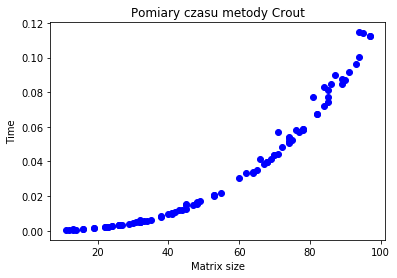

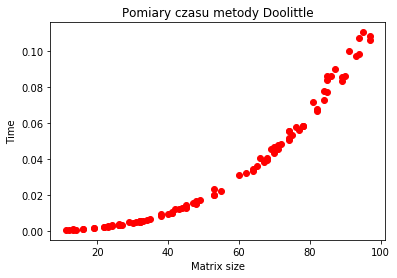

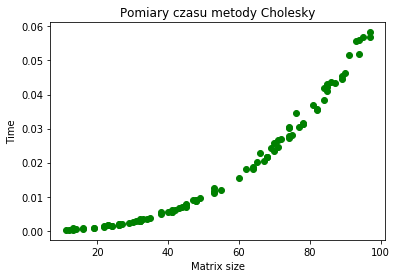

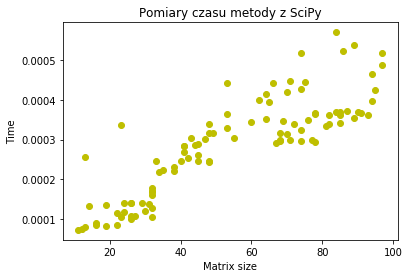

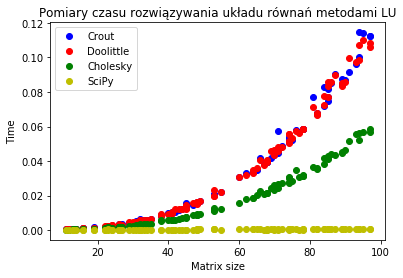

Matrix size 84 	 Crout 0.07212328910827637 	 Doolittle 0.07274913787841797	 Cholesky 0.038530826568603516 	 Scipy 0.0005710124969482422

Matrix size 44 	 Crout 0.012008905410766602 	 Doolittle 0.01246786117553711	 Cholesky 0.006974935531616211 	 Scipy 0.00028514862060546875

Matrix size 32 	 Crout 0.005033969879150391 	 Doolittle 0.005007266998291016	 Cholesky 0.003015279769897461 	 Scipy 0.00016999244689941406

Matrix size 68 	 Crout 0.039594173431396484 	 Doolittle 0.04066586494445801	 Cholesky 0.021631956100463867 	 Scipy 0.0003001689910888672

Matrix size 41 	 Crout 0.009824037551879883 	 Doolittle 0.009756803512573242	 Cholesky 0.005599021911621094 	 Scipy 0.0002849102020263672

Matrix size 14 	 Crout 0.0006630420684814453 	 Doolittle 0.0006399154663085938	 Cholesky 0.0004971027374267578 	 Scipy 0.00013113021850585938

Matrix size 11 	 Crout 0.0004420280456542969 	 Doolittle 0.0005021095275878906	 Cholesky 0.00025177001953125 	 Scipy 7.200241088867188e-05

Matrix size 22 	 Crout 0

In [31]:
import numpy as np
import time
from random import randrange
import copy
import matplotlib.pyplot as plt
import math
from sklearn import datasets
import scipy
import scipy.linalg as linalg

def Crout_decomposition(A):
    n = len(A)
    L = [[0 for x in range(n)]
            for y in range(n)];
    U = [[0 for x in range(n)]
            for y in range(n)];
    for i in range(n):
        U[i][i]=1
    sum = 0
    for j in range(n):
        for i in range(j, n, +1):
            sum = 0
            for k in range(j):
                sum = sum + L[i][k]*U[k][j]
            L[i][j] = A[i][j] - sum
        for i in range(j, n, +1):
            sum = 0
            for k in range(j):
                sum = sum + L[j][k]*U[k][i]
            if L[j][j] == 0:
                print("Error! L[i][i]= 0, method doesn't work in this case")
            U[j][i] = (A[j][i] - sum)/ L[j][j]
    return L, U

def linear_equations_Crout_method(A, b):
    L, U = Crout_decomposition(A)
    n = len(A)
    y = np.zeros(n)
    x = np.zeros(n)
    for i in range(n):
        sum = 0
        for j in range(i):
            sum = sum + L[i][j]*y[j]
        y[i]=(b[i]-sum)/L[i][i]

    for i in range(n-1, -1, -1):
        sum = 0
        for j in range(i, n, +1):
            sum = sum + U[i][j]*x[j]
        x[i]=(y[i]-sum)/U[i][i]
    return x


def Doolittle_decomposition(A):
    n = len(A)
    L = [[0 for x in range(n)]
         for y in range(n)];
    U = [[0 for x in range(n)]
         for y in range(n)];

    for i in range(n):
        L[i][i] = 1
    for i in range(n):
        for j in range(i, n, +1):
            sum = 0
            for k in range(i):
                sum = sum + L[i][k] * U[k][j]
            U[i][j] = A[i][j] - sum
        for j in range(i, n, +1):
            sum = 0
            for k in range(i):
                sum = sum + L[j][k] * U[k][i]
            if U[i][i] == 0:
                print("Error! U[i][i]= 0, method doesn't work in this case")
            L[j][i] = (A[j][i] - sum) / U[i][i]
    return L, U


def linear_equations_Doolittle_method(A, b):
    L, U = Doolittle_decomposition(A)
    n = len(A)
    y = np.zeros(n)
    for i in range(n):
        sum = 0
        for j in range(i):
            sum = sum + L[i][j] * y[j]
        y[i] = b[i] - sum

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        sum = 0
        for j in range(i, n, +1):
            sum = sum + U[i][j] * x[j]
        x[i] = (y[i] - sum) / U[i][i]
    return x


def Cholesky_decomposition(A):
    n = len(A)
    L = [[0 for x in range(n)] for y in range(n)];
    for i in range(n):
        for j in range(i + 1):
            sum = 0
            if (j == i):
                for k in range(j):
                    sum = sum + pow(L[j][k], 2)
                L[j][j] = math.sqrt(A[j][j] - sum)
            else:
                for k in range(j):
                    sum = sum + (L[i][k] * L[j][k])
                if L[j][j] != 0:
                    L[i][j] = (A[i][j] - sum) / L[j][j];
                else:
                    print("Error! L[j][j]= 0, method doesn't work in this case")
    return L


def linear_equations_Cholesky_method(A, b):
    L = Cholesky_decomposition(A)
    n = len(L)
    y = np.zeros(n)
    x = np.zeros(n)

    for i in range(n):
        sum = 0
        for j in range(i):
            sum = sum + L[i][j] * y[j]
        y[i] = (b[i] - sum) / L[i][i]

    for i in range(n - 1, -1, -1):
        sum = 0
        for j in range(i, n, +1):
            sum = sum + L[j][i] * x[j]
        x[i] = (y[i] - sum) / L[i][i]
    return x

def LU_with_scipy(A, b):
    LU = linalg.lu_factor(A)
    x = linalg.lu_solve(LU, b)
    return x

def time_measure():
    n = randrange(10, 100)
    A = datasets.make_spd_matrix(n, random_state=None)
    B = np.random.rand(n).tolist()

    start = time.time()
    linear_equations_Crout_method(copy.deepcopy(A), copy.deepcopy(B))
    stop = time.time()
    crout_method = stop - start

    start = time.time()
    linear_equations_Doolittle_method(copy.deepcopy(A), copy.deepcopy(B))
    stop = time.time()
    doolittle_method = stop - start

    start = time.time()
    linear_equations_Cholesky_method(copy.deepcopy(A), copy.deepcopy(B))
    stop = time.time()
    cholesky_method = stop - start

    start = time.time()
    LU_with_scipy(copy.deepcopy(A), copy.deepcopy(B))
    stop = time.time()
    scipy_method = stop - start

    return crout_method, doolittle_method, cholesky_method, scipy_method, n


if __name__ == '__main__':
    size_list = []
    crout_list = []
    doolittle_list = []
    cholesky_list = []
    scipy_list = []
    for i in range(100):
        crout_method, doolittle_method, cholesky_method, scipy_method, n = time_measure()
        crout_list.append(crout_method)
        doolittle_list.append(doolittle_method)
        cholesky_list.append(cholesky_method)
        scipy_list.append(scipy_method)
        size_list.append(n)

    plt.plot(size_list, crout_list, 'bo')
    plt.xlabel("Matrix size")
    plt.ylabel("Time")
    plt.title("Pomiary czasu metody Crout")
    plt.show()

    plt.plot(size_list, doolittle_list, 'ro')
    plt.xlabel("Matrix size")
    plt.ylabel("Time")
    plt.title("Pomiary czasu metody Doolittle")
    plt.show()

    plt.plot(size_list, cholesky_list, 'go')
    plt.xlabel("Matrix size")
    plt.ylabel("Time")
    plt.title("Pomiary czasu metody Cholesky")
    plt.show()

    plt.plot(size_list, scipy_list, 'yo')
    plt.xlabel("Matrix size")
    plt.ylabel("Time")
    plt.title("Pomiary czasu metody z SciPy")
    plt.show()

    plt.plot(size_list, crout_list, 'bo', label="Crout")
    plt.plot(size_list, doolittle_list, 'ro', label="Doolittle")
    plt.plot(size_list, cholesky_list, 'go', label="Cholesky")
    plt.plot(size_list, scipy_list, 'yo', label="SciPy")
    plt.xlabel("Matrix size")
    plt.ylabel("Time")
    plt.title("Pomiary czasu rozwiązywania układu równań metodami LU")
    plt.legend()
    plt.show()
    
    for i in range(100):
        print(f"Matrix size {size_list[i]} \t Crout {crout_list[i]} \t Doolittle {doolittle_list[i]}\t Cholesky {cholesky_list[i]} \t Scipy {scipy_list[i]}\n")

#### Otrzymane pomiary czasu wykonane dla każdej metody na tej samej (losowo wygenerowanej) macierzy o podanym rozmiarze (10-100)

Matrix size 90 	 Crout 0.1459810733795166 	 Doolittle 0.1113119125366211	 Cholesky 0.05257606506347656 	 Scipy 0.0005970001220703125

Matrix size 85 	 Crout 0.13330888748168945 	 Doolittle 0.09947323799133301	 Cholesky 0.04169893264770508 	 Scipy 0.00044798851013183594

Matrix size 63 	 Crout 0.039067983627319336 	 Doolittle 0.04928708076477051	 Cholesky 0.01960587501525879 	 Scipy 0.00038123130798339844

Matrix size 35 	 Crout 0.009150981903076172 	 Doolittle 0.009057044982910156	 Cholesky 0.005692958831787109 	 Scipy 0.00023293495178222656

Matrix size 51 	 Crout 0.022313833236694336 	 Doolittle 0.023576974868774414	 Cholesky 0.011660099029541016 	 Scipy 0.00031113624572753906

Matrix size 69 	 Crout 0.06975412368774414 	 Doolittle 0.06397795677185059	 Cholesky 0.02395009994506836 	 Scipy 0.0003681182861328125

Matrix size 52 	 Crout 0.028417110443115234 	 Doolittle 0.02769017219543457	 Cholesky 0.012617826461791992 	 Scipy 0.0002722740173339844

Matrix size 66 	 Crout 0.06401586532592773 	 Doolittle 0.05981898307800293	 Cholesky 0.02113199234008789 	 Scipy 0.0003597736358642578

Matrix size 34 	 Crout 0.010072946548461914 	 Doolittle 0.009372949600219727	 Cholesky 0.003598928451538086 	 Scipy 0.0001308917999267578

Matrix size 11 	 Crout 0.0006940364837646484 	 Doolittle 0.0005247592926025391	 Cholesky 0.00026416778564453125 	 Scipy 5.984306335449219e-05

Matrix size 10 	 Crout 0.00044989585876464844 	 Doolittle 0.00043082237243652344	 Cholesky 0.0002770423889160156 	 Scipy 5.602836608886719e-05

Matrix size 83 	 Crout 0.12368202209472656 	 Doolittle 0.0906829833984375	 Cholesky 0.04019618034362793 	 Scipy 0.0005347728729248047

Matrix size 48 	 Crout 0.018352746963500977 	 Doolittle 0.02128314971923828	 Cholesky 0.009531974792480469 	 Scipy 0.00017595291137695312

Matrix size 11 	 Crout 0.0005488395690917969 	 Doolittle 0.0007028579711914062	 Cholesky 0.0004379749298095703 	 Scipy 0.0001010894775390625

Matrix size 51 	 Crout 0.02924799919128418 	 Doolittle 0.025417089462280273	 Cholesky 0.013203859329223633 	 Scipy 0.0003070831298828125

Matrix size 47 	 Crout 0.024303913116455078 	 Doolittle 0.027826309204101562	 Cholesky 0.012870073318481445 	 Scipy 0.0003159046173095703

Matrix size 23 	 Crout 0.004277944564819336 	 Doolittle 0.0043451786041259766	 Cholesky 0.0014100074768066406 	 Scipy 0.00010395050048828125

Matrix size 30 	 Crout 0.0056459903717041016 	 Doolittle 0.007411956787109375	 Cholesky 0.002947092056274414 	 Scipy 0.00022029876708984375

Matrix size 94 	 Crout 0.16106867790222168 	 Doolittle 0.1265580654144287	 Cholesky 0.05778098106384277 	 Scipy 0.0004839897155761719

Matrix size 67 	 Crout 0.06365799903869629 	 Doolittle 0.06128263473510742	 Cholesky 0.021508216857910156 	 Scipy 0.00047206878662109375

Matrix size 96 	 Crout 0.1683948040008545 	 Doolittle 0.12692880630493164	 Cholesky 0.0580592155456543 	 Scipy 0.0004849433898925781

Matrix size 97 	 Crout 0.17104578018188477 	 Doolittle 0.12672710418701172	 Cholesky 0.057698726654052734 	 Scipy 0.0004630088806152344

Matrix size 23 	 Crout 0.0028662681579589844 	 Doolittle 0.003226757049560547	 Cholesky 0.001360177993774414 	 Scipy 9.608268737792969e-05

Matrix size 68 	 Crout 0.07240509986877441 	 Doolittle 0.060240983963012695	 Cholesky 0.021166086196899414 	 Scipy 0.0003809928894042969

Matrix size 86 	 Crout 0.1335608959197998 	 Doolittle 0.09235095977783203	 Cholesky 0.04279494285583496 	 Scipy 0.0005991458892822266

Matrix size 68 	 Crout 0.06924700736999512 	 Doolittle 0.06115412712097168	 Cholesky 0.022808074951171875 	 Scipy 0.0004150867462158203

Matrix size 42 	 Crout 0.013809919357299805 	 Doolittle 0.01606607437133789	 Cholesky 0.008583784103393555 	 Scipy 0.0001571178436279297

Matrix size 73 	 Crout 0.08449578285217285 	 Doolittle 0.07032513618469238	 Cholesky 0.029585838317871094 	 Scipy 0.0004012584686279297

Matrix size 84 	 Crout 0.1252601146697998 	 Doolittle 0.09143304824829102	 Cholesky 0.039285898208618164 	 Scipy 0.0003948211669921875

Matrix size 77 	 Crout 0.10257506370544434 	 Doolittle 0.08171796798706055	 Cholesky 0.03315591812133789 	 Scipy 0.0004391670227050781

Matrix size 77 	 Crout 0.10571694374084473 	 Doolittle 0.07644820213317871	 Cholesky 0.032706260681152344 	 Scipy 0.0004839897155761719

Matrix size 48 	 Crout 0.0177762508392334 	 Doolittle 0.017667770385742188	 Cholesky 0.009991884231567383 	 Scipy 0.0001800060272216797

Matrix size 45 	 Crout 0.014700174331665039 	 Doolittle 0.019063711166381836	 Cholesky 0.010276079177856445 	 Scipy 0.0002269744873046875

Matrix size 75 	 Crout 0.09586787223815918 	 Doolittle 0.07093405723571777	 Cholesky 0.0297391414642334 	 Scipy 0.0004699230194091797

Matrix size 99 	 Crout 0.17793512344360352 	 Doolittle 0.13250994682312012	 Cholesky 0.06448101997375488 	 Scipy 0.0005829334259033203

Matrix size 29 	 Crout 0.005110979080200195 	 Doolittle 0.00491023063659668	 Cholesky 0.002361774444580078 	 Scipy 0.00015401840209960938

Matrix size 19 	 Crout 0.0026199817657470703 	 Doolittle 0.0024580955505371094	 Cholesky 0.0013730525970458984 	 Scipy 9.417533874511719e-05

Matrix size 69 	 Crout 0.06838107109069824 	 Doolittle 0.06727194786071777	 Cholesky 0.0269930362701416 	 Scipy 0.00035119056701660156

Matrix size 62 	 Crout 0.04829692840576172 	 Doolittle 0.04418683052062988	 Cholesky 0.018658161163330078 	 Scipy 0.00038504600524902344

Matrix size 58 	 Crout 0.03389906883239746 	 Doolittle 0.03562498092651367	 Cholesky 0.016041994094848633 	 Scipy 0.0003609657287597656

Matrix size 99 	 Crout 0.17607593536376953 	 Doolittle 0.13827300071716309	 Cholesky 0.06106090545654297 	 Scipy 0.0005400180816650391

Matrix size 22 	 Crout 0.0035119056701660156 	 Doolittle 0.0025789737701416016	 Cholesky 0.0012369155883789062 	 Scipy 9.393692016601562e-05

Matrix size 12 	 Crout 0.0006661415100097656 	 Doolittle 0.0009567737579345703	 Cholesky 0.0005059242248535156 	 Scipy 7.295608520507812e-05

Matrix size 28 	 Crout 0.005719900131225586 	 Doolittle 0.004879951477050781	 Cholesky 0.0021691322326660156 	 Scipy 0.00016188621520996094

Matrix size 23 	 Crout 0.0032339096069335938 	 Doolittle 0.003283977508544922	 Cholesky 0.001338958740234375 	 Scipy 9.202957153320312e-05

Matrix size 77 	 Crout 0.10056781768798828 	 Doolittle 0.0729210376739502	 Cholesky 0.030993938446044922 	 Scipy 0.0004642009735107422

Matrix size 27 	 Crout 0.0040740966796875 	 Doolittle 0.0039670467376708984	 Cholesky 0.0024650096893310547 	 Scipy 0.00021505355834960938

Matrix size 53 	 Crout 0.028725862503051758 	 Doolittle 0.026823997497558594	 Cholesky 0.013283014297485352 	 Scipy 0.0003368854522705078

Matrix size 87 	 Crout 0.1306440830230713 	 Doolittle 0.09981703758239746	 Cholesky 0.04538083076477051 	 Scipy 0.0004360675811767578

Matrix size 36 	 Crout 0.008651971817016602 	 Doolittle 0.009708881378173828	 Cholesky 0.004786252975463867 	 Scipy 0.0001621246337890625

Matrix size 51 	 Crout 0.022458791732788086 	 Doolittle 0.02504897117614746	 Cholesky 0.01217508316040039 	 Scipy 0.000286102294921875

Matrix size 35 	 Crout 0.011551141738891602 	 Doolittle 0.009478092193603516	 Cholesky 0.005361080169677734 	 Scipy 0.00030684471130371094

Matrix size 82 	 Crout 0.11890506744384766 	 Doolittle 0.08820223808288574	 Cholesky 0.037316083908081055 	 Scipy 0.0003981590270996094

Matrix size 24 	 Crout 0.003098726272583008 	 Doolittle 0.002997875213623047	 Cholesky 0.0017993450164794922 	 Scipy 0.00018477439880371094

Matrix size 44 	 Crout 0.0172119140625 	 Doolittle 0.016782045364379883	 Cholesky 0.008476018905639648 	 Scipy 0.0002219676971435547

Matrix size 46 	 Crout 0.01952219009399414 	 Doolittle 0.016958951950073242	 Cholesky 0.009061098098754883 	 Scipy 0.00023293495178222656

Matrix size 66 	 Crout 0.06302785873413086 	 Doolittle 0.06102299690246582	 Cholesky 0.021036863327026367 	 Scipy 0.00038504600524902344

Matrix size 14 	 Crout 0.0009028911590576172 	 Doolittle 0.0008671283721923828	 Cholesky 0.0004391670227050781 	 Scipy 5.6743621826171875e-05

Matrix size 54 	 Crout 0.03372812271118164 	 Doolittle 0.03154611587524414	 Cholesky 0.014393806457519531 	 Scipy 0.000347137451171875

Matrix size 61 	 Crout 0.037358999252319336 	 Doolittle 0.04318690299987793	 Cholesky 0.02021002769470215 	 Scipy 0.00040602684020996094

Matrix size 69 	 Crout 0.07204985618591309 	 Doolittle 0.06501007080078125	 Cholesky 0.024319887161254883 	 Scipy 0.0004372596740722656

Matrix size 57 	 Crout 0.032801151275634766 	 Doolittle 0.035446882247924805	 Cholesky 0.016458988189697266 	 Scipy 0.0002949237823486328

Matrix size 95 	 Crout 0.15894174575805664 	 Doolittle 0.12393975257873535	 Cholesky 0.05435585975646973 	 Scipy 0.0004410743713378906

Matrix size 20 	 Crout 0.0020339488983154297 	 Doolittle 0.0019371509552001953	 Cholesky 0.0009467601776123047 	 Scipy 7.295608520507812e-05

Matrix size 36 	 Crout 0.011490106582641602 	 Doolittle 0.012188911437988281	 Cholesky 0.005116939544677734 	 Scipy 0.00018405914306640625

Matrix size 62 	 Crout 0.04414200782775879 	 Doolittle 0.043988943099975586	 Cholesky 0.019322872161865234 	 Scipy 0.0004181861877441406

Matrix size 72 	 Crout 0.08228707313537598 	 Doolittle 0.07105588912963867	 Cholesky 0.027610063552856445 	 Scipy 0.00045013427734375

Matrix size 11 	 Crout 0.0005660057067871094 	 Doolittle 0.0005199909210205078	 Cholesky 0.00026798248291015625 	 Scipy 5.3882598876953125e-05

Matrix size 97 	 Crout 0.16684699058532715 	 Doolittle 0.12828326225280762	 Cholesky 0.05915713310241699 	 Scipy 0.0005538463592529297

Matrix size 92 	 Crout 0.15566587448120117 	 Doolittle 0.1113128662109375	 Cholesky 0.0509638786315918 	 Scipy 0.00040411949157714844

Matrix size 10 	 Crout 0.00046515464782714844 	 Doolittle 0.00043392181396484375	 Cholesky 0.00022292137145996094 	 Scipy 5.0067901611328125e-05

Matrix size 33 	 Crout 0.008253812789916992 	 Doolittle 0.007392168045043945	 Cholesky 0.004982948303222656 	 Scipy 0.0001900196075439453

Matrix size 91 	 Crout 0.1521291732788086 	 Doolittle 0.11346602439880371	 Cholesky 0.049443960189819336 	 Scipy 0.0004017353057861328

Matrix size 60 	 Crout 0.03592514991760254 	 Doolittle 0.0414729118347168	 Cholesky 0.020021915435791016 	 Scipy 0.000370025634765625

Matrix size 11 	 Crout 0.000553131103515625 	 Doolittle 0.0005240440368652344	 Cholesky 0.00027108192443847656 	 Scipy 5.1975250244140625e-05

Matrix size 77 	 Crout 0.09982705116271973 	 Doolittle 0.07874774932861328	 Cholesky 0.03208589553833008 	 Scipy 0.00047326087951660156

Matrix size 63 	 Crout 0.04089808464050293 	 Doolittle 0.04734325408935547	 Cholesky 0.02761077880859375 	 Scipy 0.00047898292541503906

Matrix size 35 	 Crout 0.010323286056518555 	 Doolittle 0.010084867477416992	 Cholesky 0.005991935729980469 	 Scipy 0.0001850128173828125

Matrix size 21 	 Crout 0.002885103225708008 	 Doolittle 0.002980947494506836	 Cholesky 0.0020248889923095703 	 Scipy 0.00015616416931152344

Matrix size 17 	 Crout 0.0025289058685302734 	 Doolittle 0.0025339126586914062	 Cholesky 0.0012421607971191406 	 Scipy 0.00012993812561035156

Matrix size 46 	 Crout 0.026434898376464844 	 Doolittle 0.020410776138305664	 Cholesky 0.007948160171508789 	 Scipy 0.00024700164794921875

Matrix size 46 	 Crout 0.01680922508239746 	 Doolittle 0.018501758575439453	 Cholesky 0.00880885124206543 	 Scipy 0.0002582073211669922

Matrix size 36 	 Crout 0.009508848190307617 	 Doolittle 0.008448123931884766	 Cholesky 0.004743814468383789 	 Scipy 0.0001430511474609375

Matrix size 75 	 Crout 0.09904122352600098 	 Doolittle 0.0727229118347168	 Cholesky 0.0314638614654541 	 Scipy 0.00047397613525390625

Matrix size 54 	 Crout 0.030871152877807617 	 Doolittle 0.026319026947021484	 Cholesky 0.015104055404663086 	 Scipy 0.0003647804260253906

Matrix size 28 	 Crout 0.005992889404296875 	 Doolittle 0.006862163543701172	 Cholesky 0.004002809524536133 	 Scipy 0.00031113624572753906

Matrix size 27 	 Crout 0.0071299076080322266 	 Doolittle 0.007612943649291992	 Cholesky 0.003880023956298828 	 Scipy 0.00031304359436035156

Matrix size 16 	 Crout 0.002151012420654297 	 Doolittle 0.001968860626220703	 Cholesky 0.001013040542602539 	 Scipy 0.00011086463928222656

Matrix size 11 	 Crout 0.0008990764617919922 	 Doolittle 0.0008976459503173828	 Cholesky 0.0004940032958984375 	 Scipy 8.821487426757812e-05

Matrix size 88 	 Crout 0.14440703392028809 	 Doolittle 0.1050560474395752	 Cholesky 0.04766273498535156 	 Scipy 0.0005211830139160156

Matrix size 84 	 Crout 0.12540507316589355 	 Doolittle 0.0939950942993164	 Cholesky 0.03993988037109375 	 Scipy 0.0004889965057373047

Matrix size 88 	 Crout 0.13962697982788086 	 Doolittle 0.10723614692687988	 Cholesky 0.04588890075683594 	 Scipy 0.0004169940948486328

Matrix size 13 	 Crout 0.0007750988006591797 	 Doolittle 0.0007359981536865234	 Cholesky 0.00037598609924316406 	 Scipy 5.5789947509765625e-05

Matrix size 50 	 Crout 0.023952007293701172 	 Doolittle 0.02210712432861328	 Cholesky 0.010483026504516602 	 Scipy 0.0002758502960205078

Matrix size 59 	 Crout 0.038378000259399414 	 Doolittle 0.03796124458312988	 Cholesky 0.02089977264404297 	 Scipy 0.00045299530029296875

Matrix size 46 	 Crout 0.01856708526611328 	 Doolittle 0.0178220272064209	 Cholesky 0.009667158126831055 	 Scipy 0.00021576881408691406

Matrix size 13 	 Crout 0.001165151596069336 	 Doolittle 0.0011098384857177734	 Cholesky 0.0005970001220703125 	 Scipy 9.083747863769531e-05

Matrix size 13 	 Crout 0.0011110305786132812 	 Doolittle 0.0007376670837402344	 Cholesky 0.00037932395935058594 	 Scipy 5.8650970458984375e-05

Matrix size 73 	 Crout 0.08636307716369629 	 Doolittle 0.06651806831359863	 Cholesky 0.026643991470336914 	 Scipy 0.00048279762268066406

Matrix size 50 	 Crout 0.024670124053955078 	 Doolittle 0.02302384376525879	 Cholesky 0.010878324508666992 	 Scipy 0.00028705596923828125
